<a href="https://colab.research.google.com/github/boorashiva12/AIML-Training-Shiva/blob/main/Assignment_Day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question-1**

Autoencoder Implementation

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
235/235 [==============================] - 5s 16ms/step - loss: 0.0691 - val_loss: 0.0410
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0351 - val_loss: 0.0295
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0265 - val_loss: 0.0230
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0213 - val_loss: 0.0189
Epoch 5/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0179 - val_loss: 0.0162
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0156 - val_loss: 0.0143
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0140 - val_loss: 0.0130
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0128 - val_loss: 0.0120
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0120 - val_loss: 0.0114
Epoch 10/10
313/313 [=====

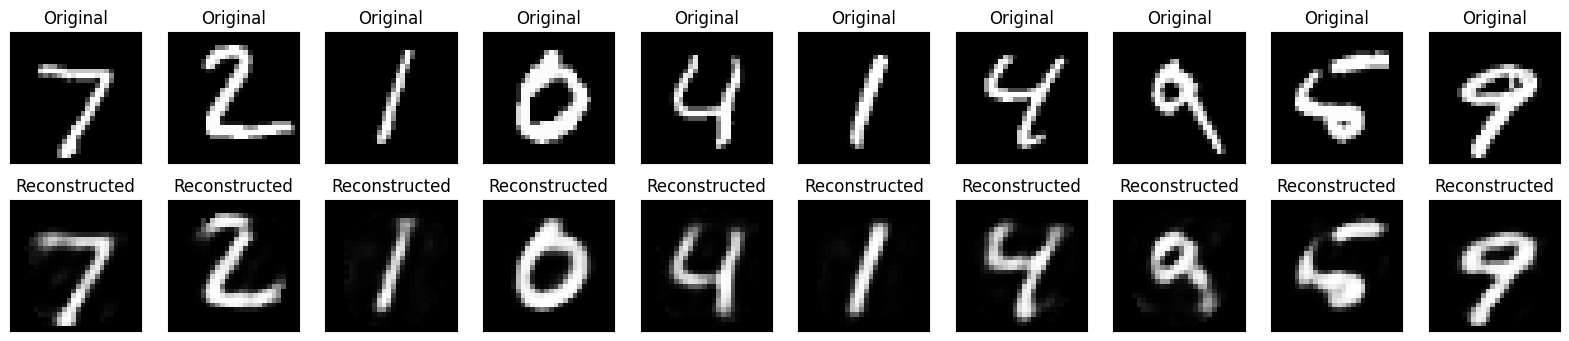

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load a dataset (e.g., MNIST)
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Define the autoencoder architecture
encoding_dim = 32  # Size of the latent space

input_img = tf.keras.layers.Input(shape=(28, 28))
encoded = tf.keras.layers.Flatten()(input_img)
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
decoded = tf.keras.layers.Reshape((28, 28))(decoded)

autoencoder = tf.keras.Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images
encoded_images = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # Number of images to plot
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_images[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
